In [ ]:
#python project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df=pd.read_csv("Downloads/Diwali Sales Data (1).csv",encoding="unicode_escape")
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
#Know we do data cleaning

In [5]:
#drop status and  unnamed1 column
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [6]:
#lets see which column has null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
#know drop the rows having null values
df.dropna(inplace=True)

In [8]:
df.shape

(11239, 13)

In [9]:
#changing data type of Amount column
df['Amount']=df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int64')

In [11]:
#use of describe function---only apply on numeric columns
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [12]:
#Exploratory Data Analysis

In [13]:
#Gender-based trend

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

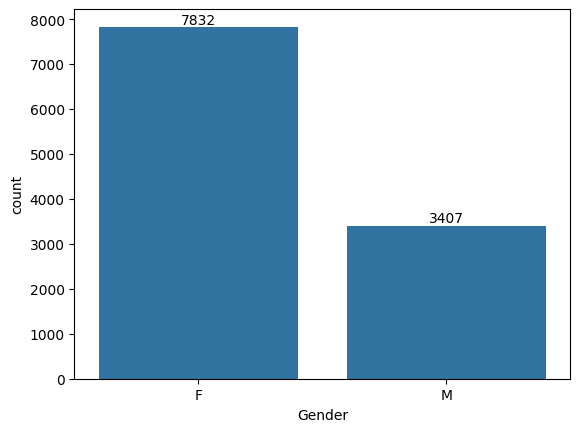

In [15]:
#countplot-----------for count of gender(male and female)
ax=sns.countplot(x='Gender',data=df)
#to give label
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

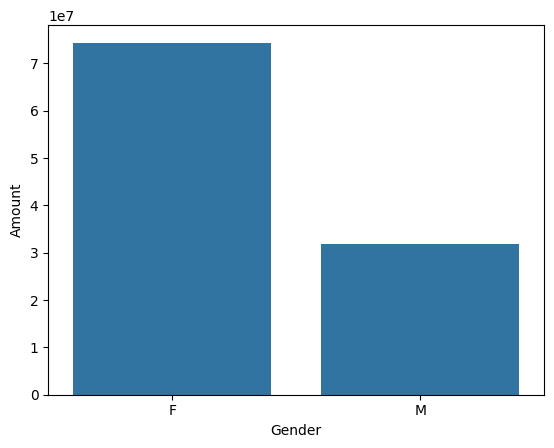

In [16]:
#calculating thair individual purchase
sales_to=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_to)

In [17]:
#from above plots we conclude that female purchase more than mens and thair purchasing power is also large.

In [18]:
#Age

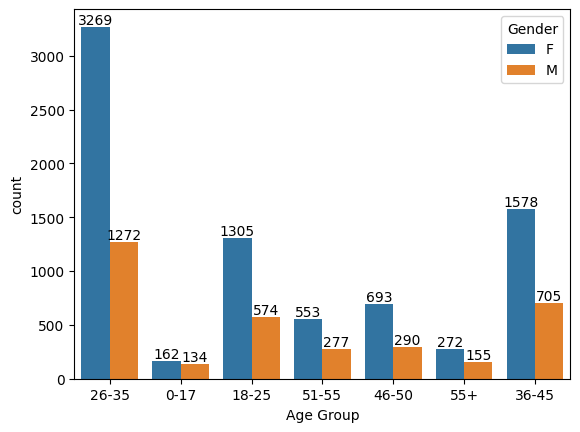

In [19]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for  bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

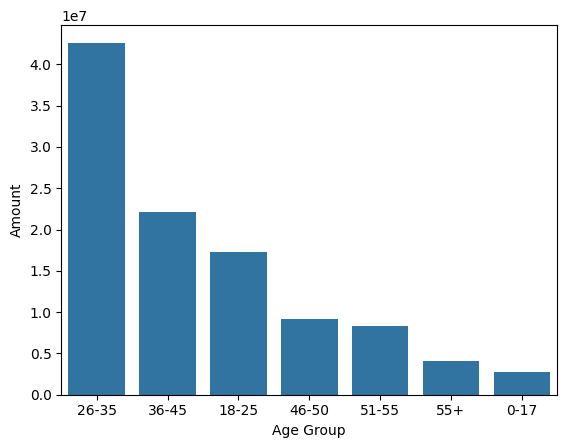

In [20]:
#lets see total amount spent per age group
age_group=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=age_group)

In [21]:
#conclusion------from above graph most of customers are of agegroup(26-35) and most of these are females

In [22]:
#State wise 

<Axes: xlabel='State', ylabel='Orders'>

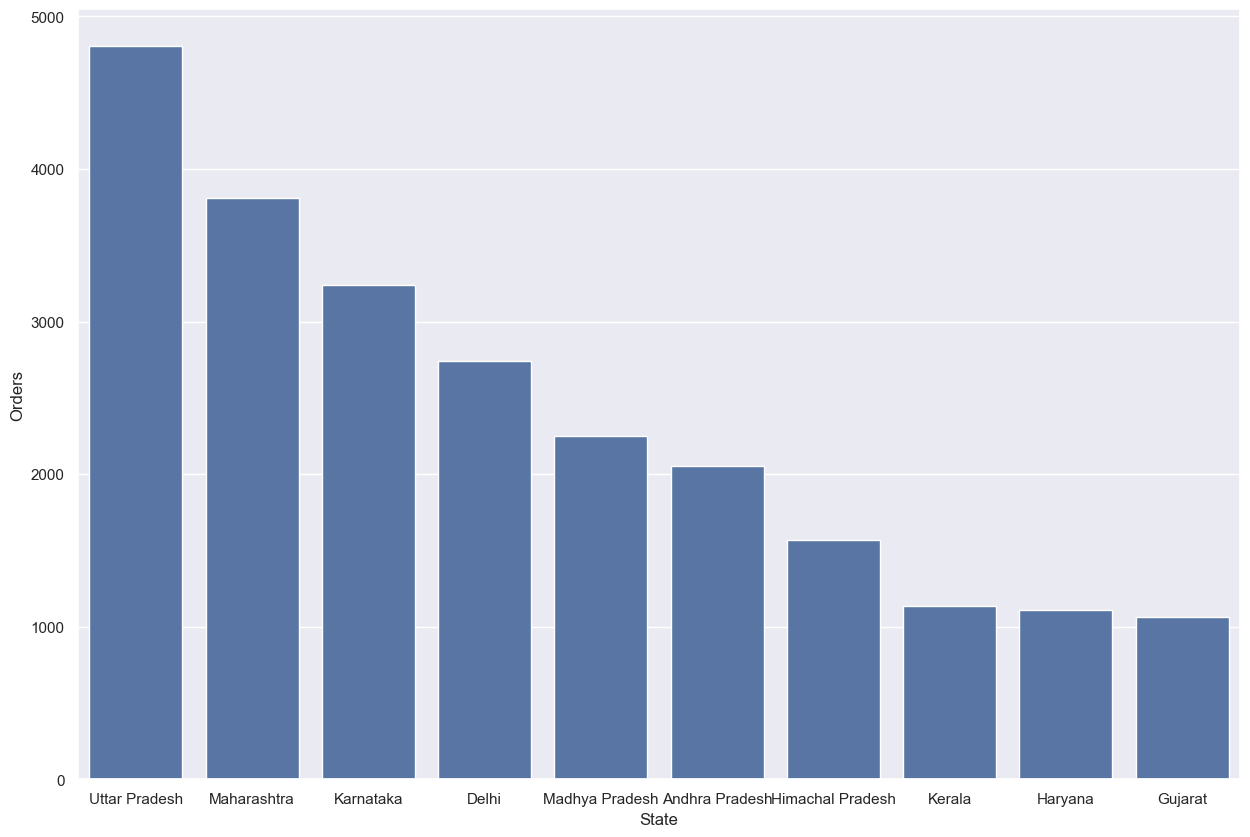

In [23]:
# total number of orders from top 10 states
states=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values( by='Orders',ascending=False).head(10)
#control its size
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(data=states,x='State',y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

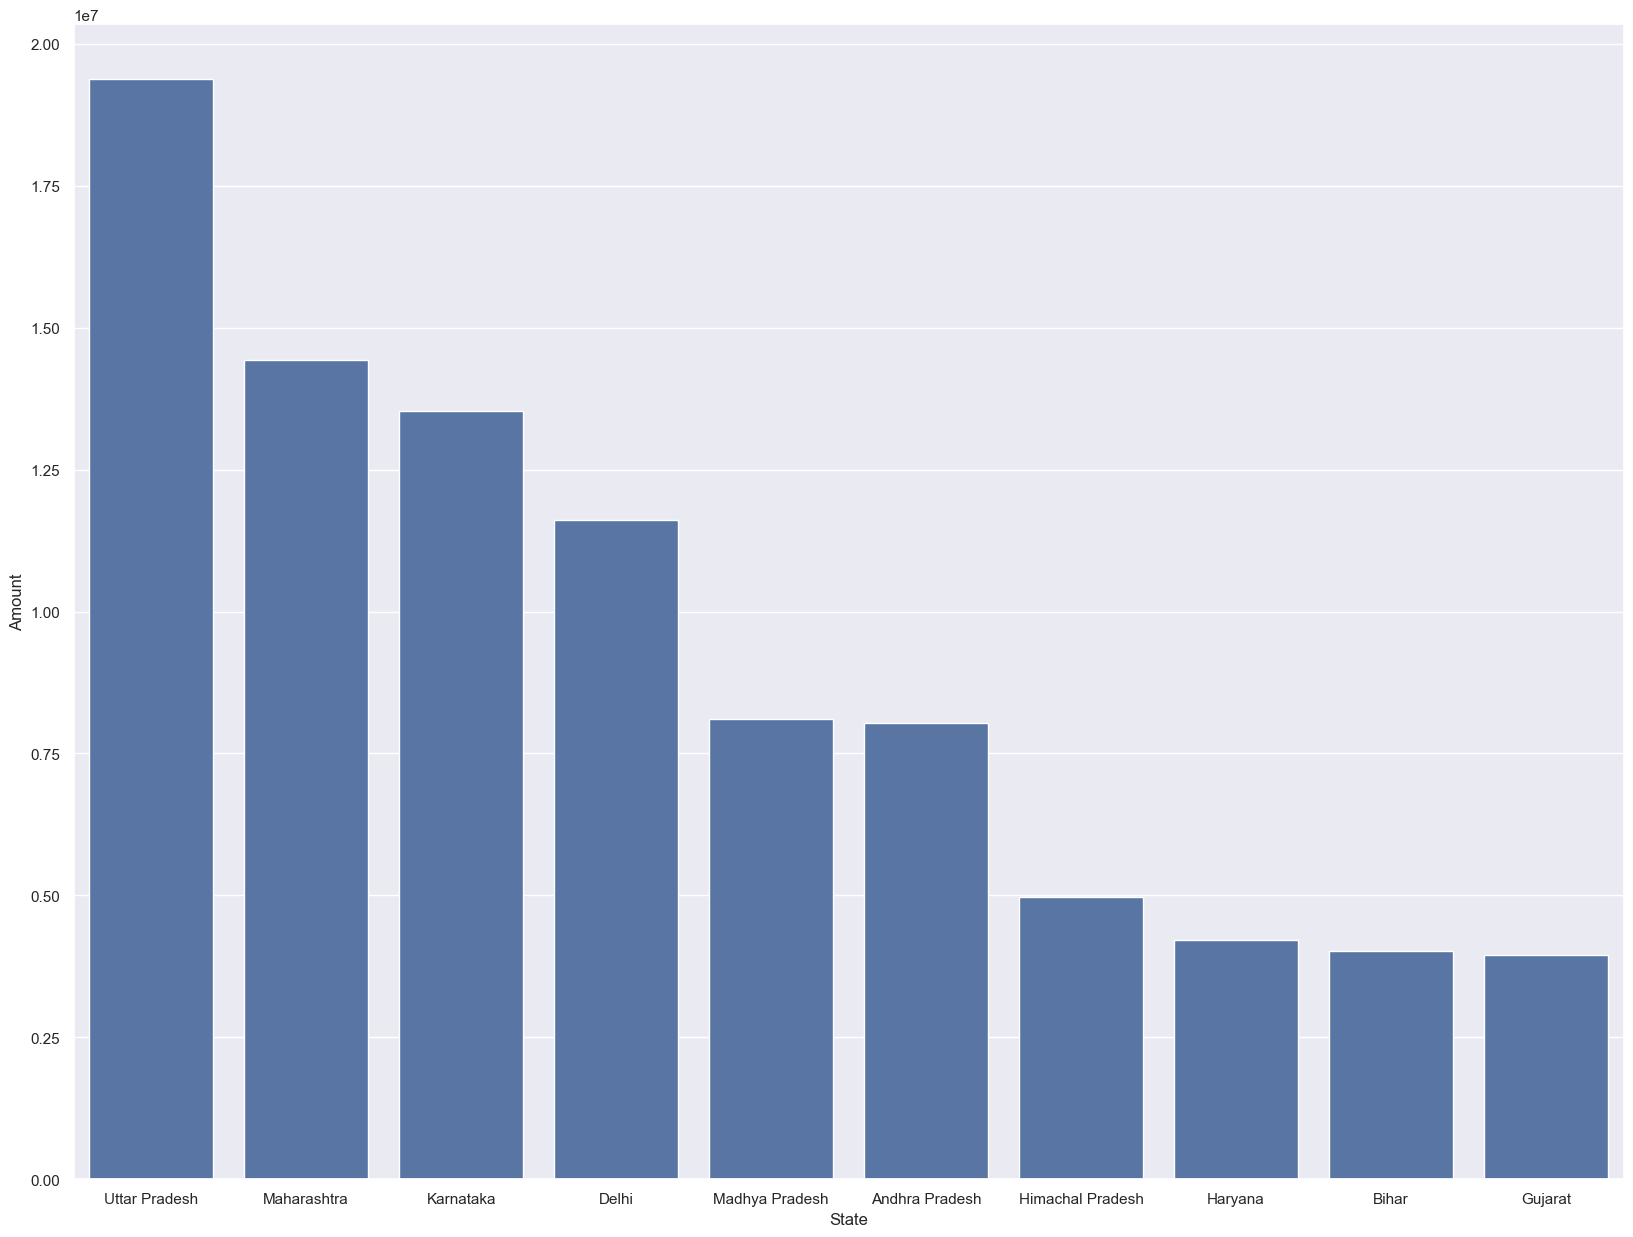

In [24]:
#total amount spent by top 10 states
states=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values( by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,15)})
sns.barplot(data=states,x='State',y='Amount')

In [25]:
#conclusion-most of the customers from Utter Pradesh,Mahastara,Karnatka

In [26]:
#marrid status

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


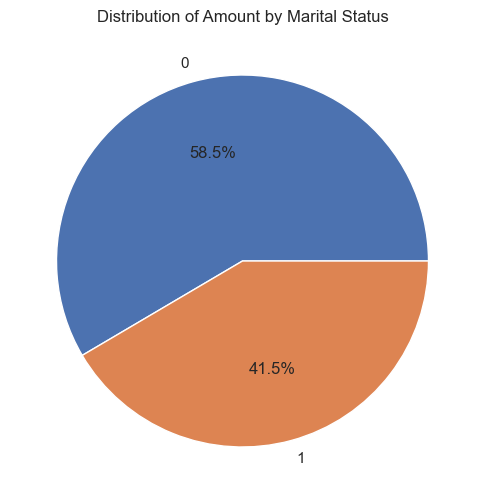

In [65]:
marital_data=df.groupby(['Marital_Status'],as_index=False)['Amount'].sum()
plt.figure(figsize=(6, 6))
plt.title('Distribution of Amount by Marital Status')
plt.axis('equal')

plt.pie(marital_data['Amount'], labels=marital_data['Marital_Status'],autopct='%1.1f%%')
plt.show()

In [ ]:
#occuption

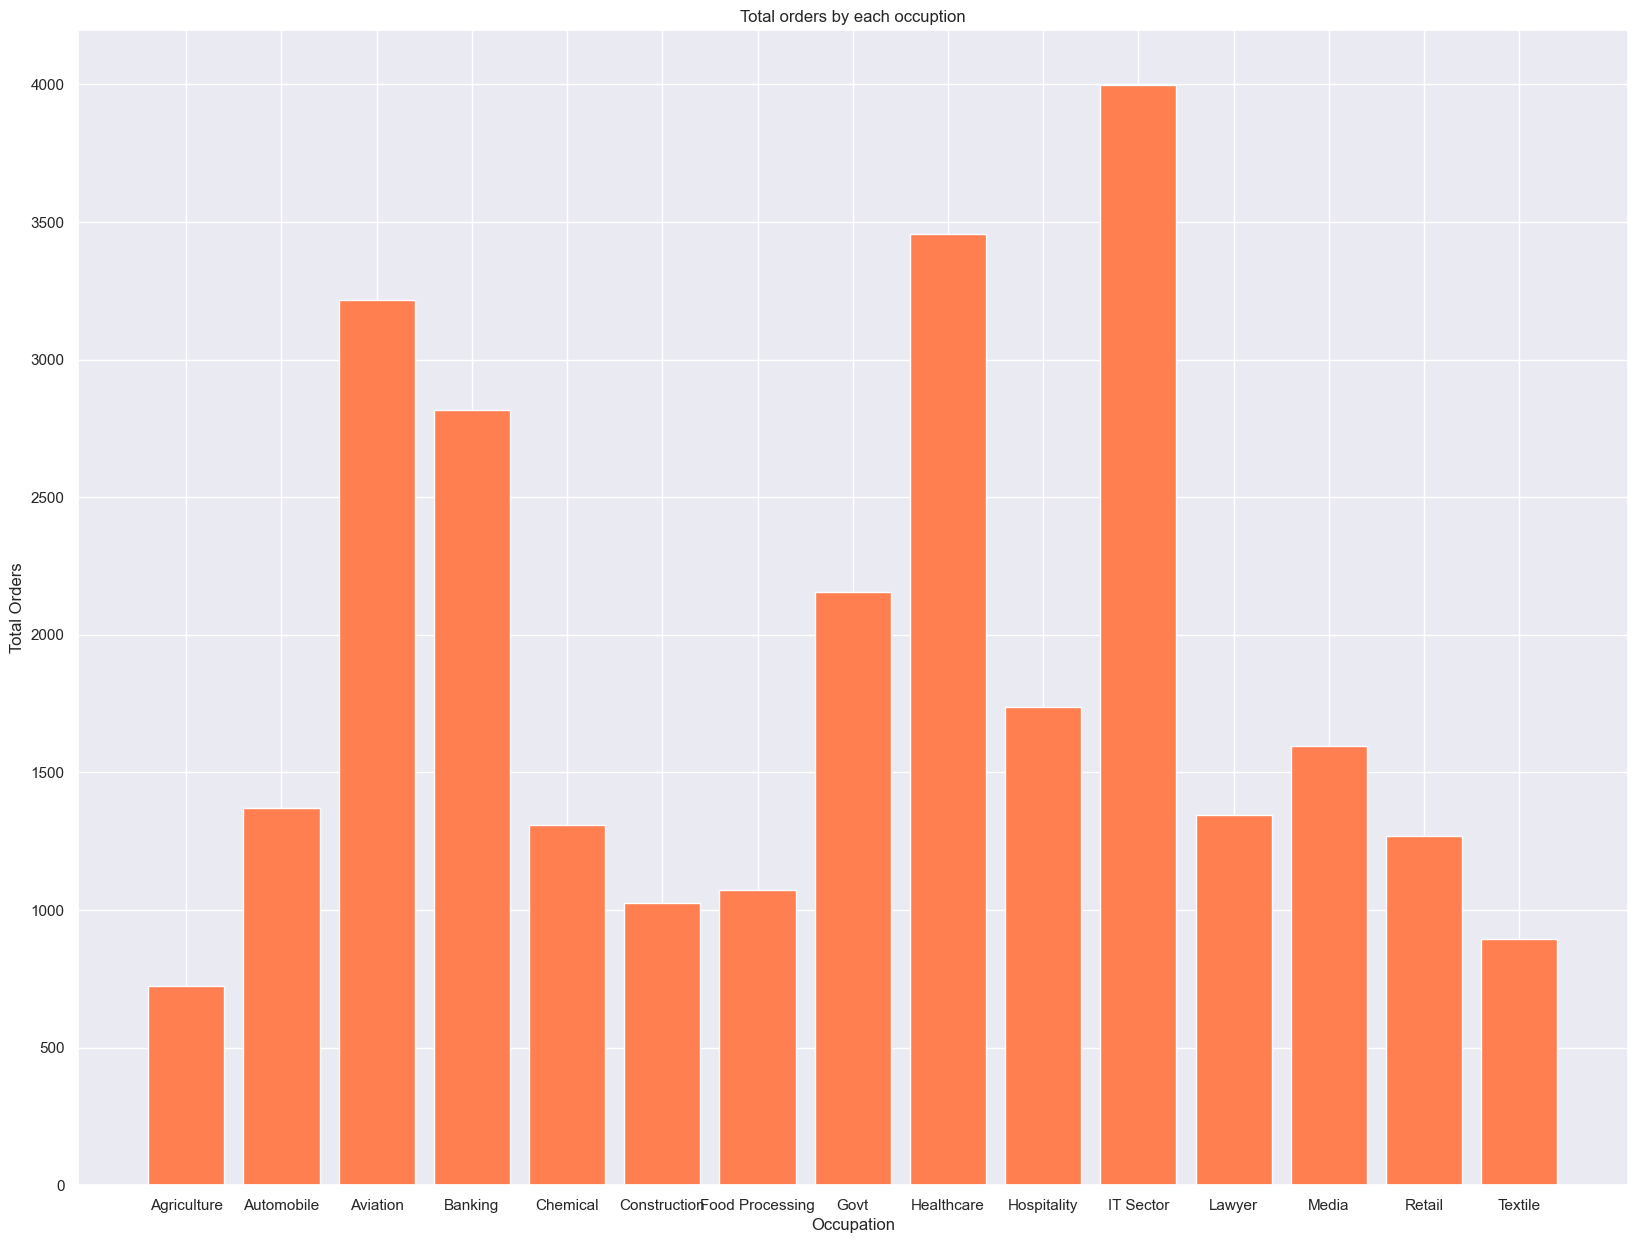

In [54]:
occupation_data=df.groupby(['Occupation'],as_index=False)['Orders'].sum()
plt.title("Total orders by each occuption")
plt.xlabel("Occupation")
plt.ylabel("Total Orders")
plt.bar(occupation_data['Occupation'], occupation_data['Orders'], color='#FF7F50')
plt.show()

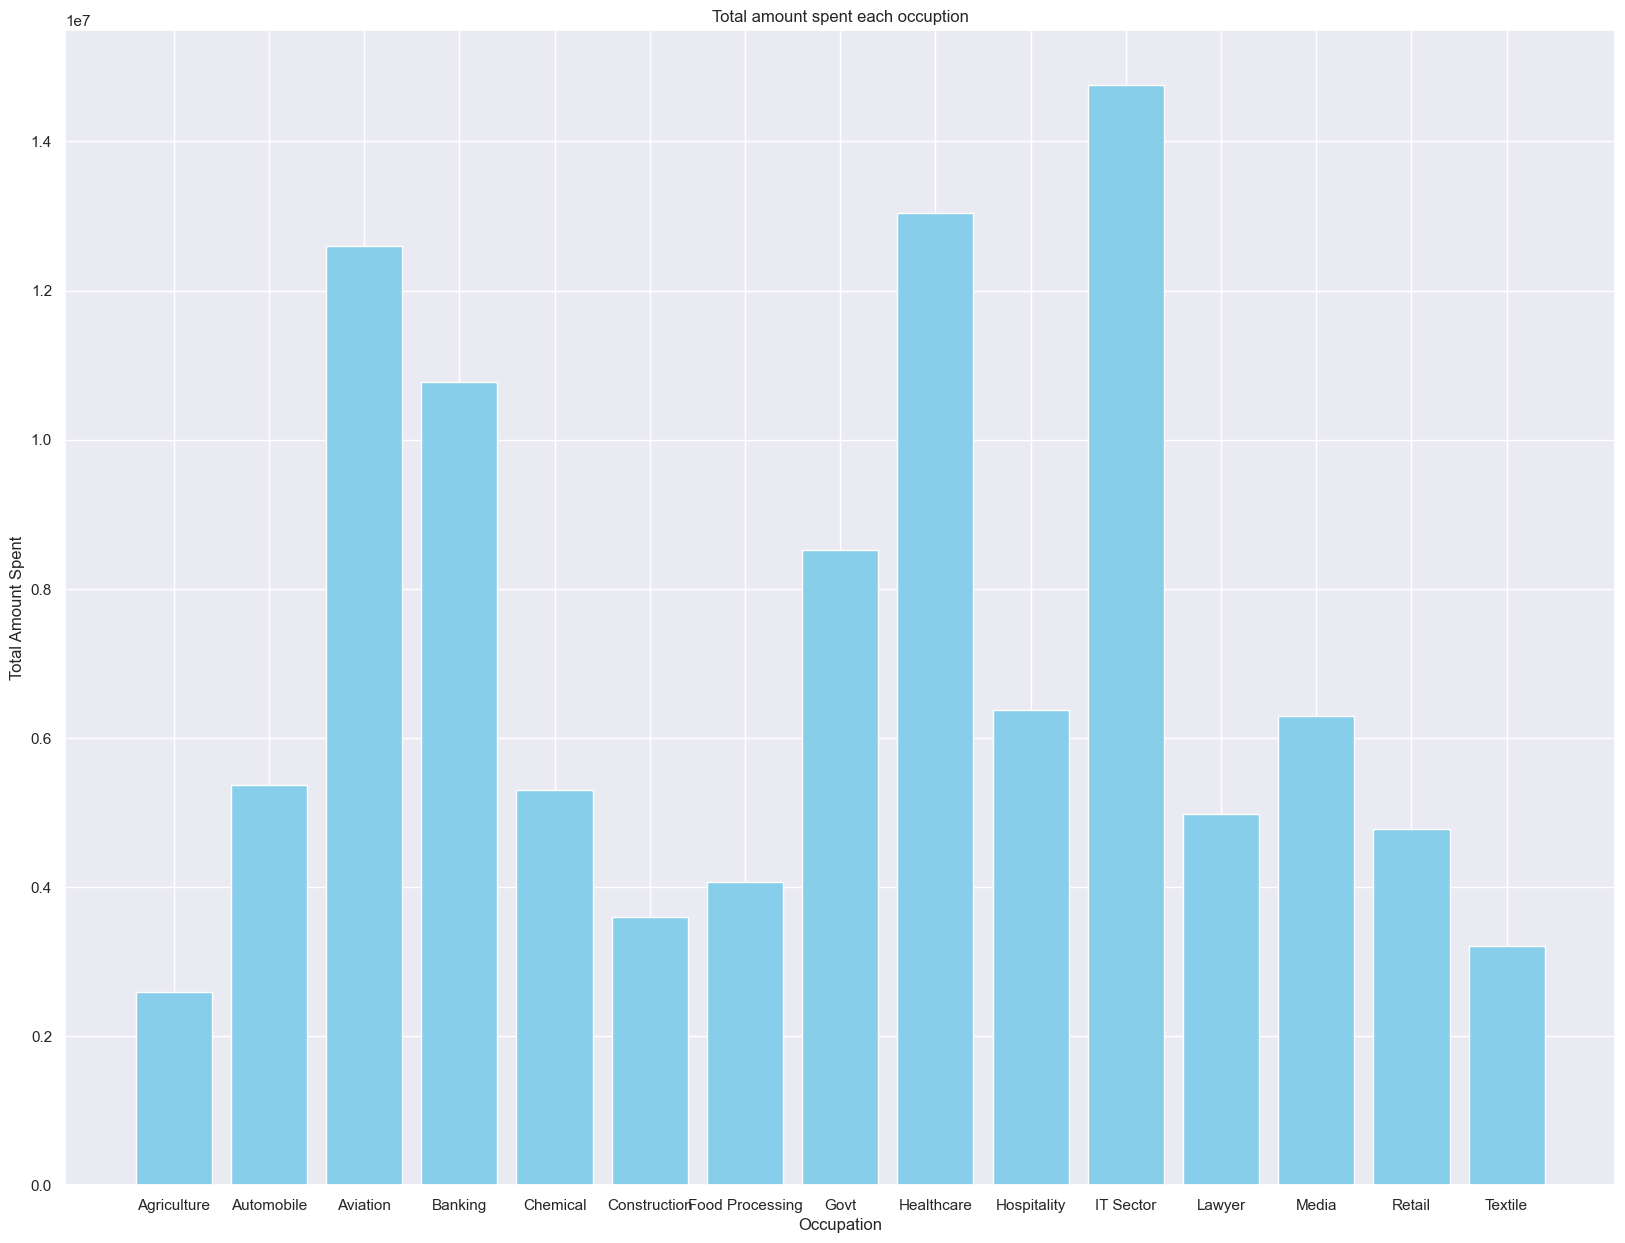

In [53]:
occupation_data=df.groupby(['Occupation'],as_index=False)['Amount'].sum()
plt.title("Total amount spent each occuption")
plt.xlabel("Occupation")
plt.ylabel("Total Amount Spent")
plt.bar(occupation_data['Occupation'], occupation_data['Amount'], color='#87CEEB')
plt.show()

In [ ]:
#product Category


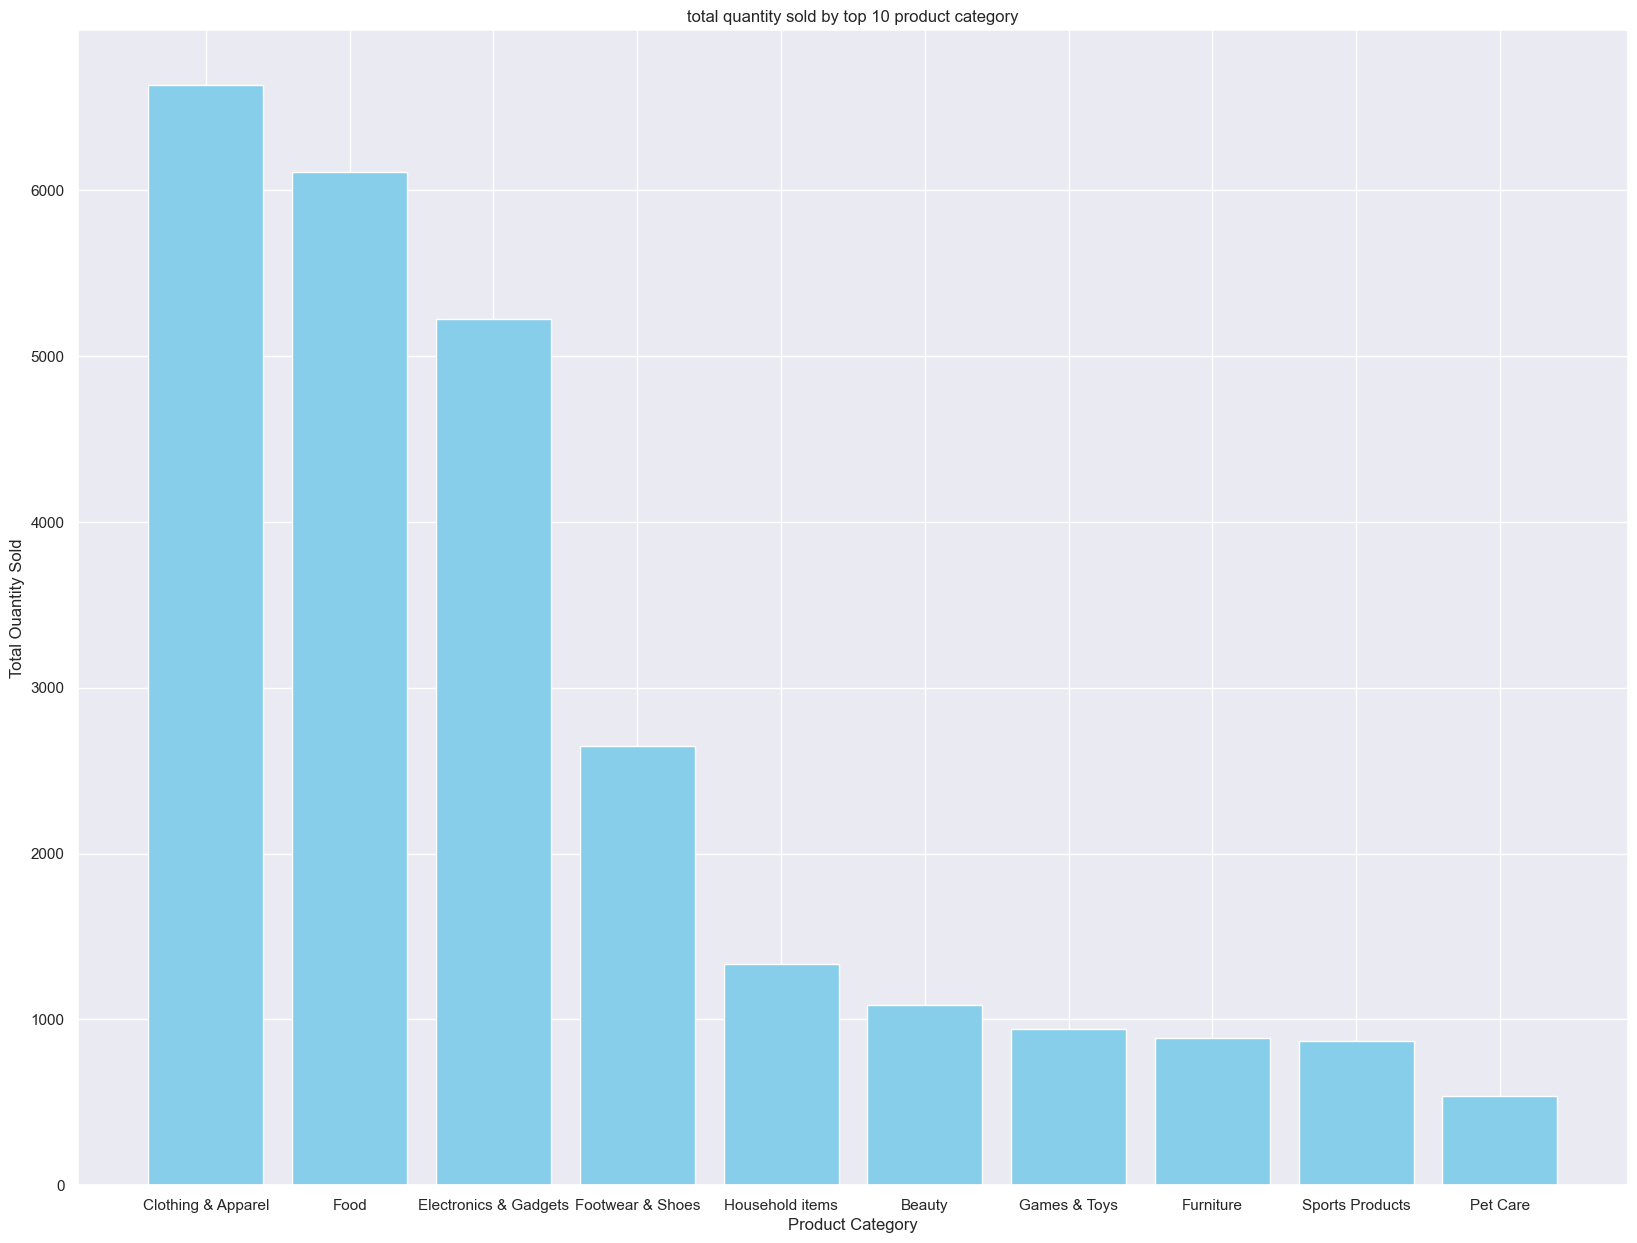

In [61]:
product_data=df.groupby(['Product_Category'],as_index=False)['Orders'].sum().sort_values( by='Orders',ascending=False).head(10)
plt.title("total quantity sold by top 10 product category")
plt.xlabel("Product Category")
plt.ylabel("Total Ouantity Sold")
plt.bar(product_data['Product_Category'],product_data['Orders'], color='#87CEEB')
plt.show()

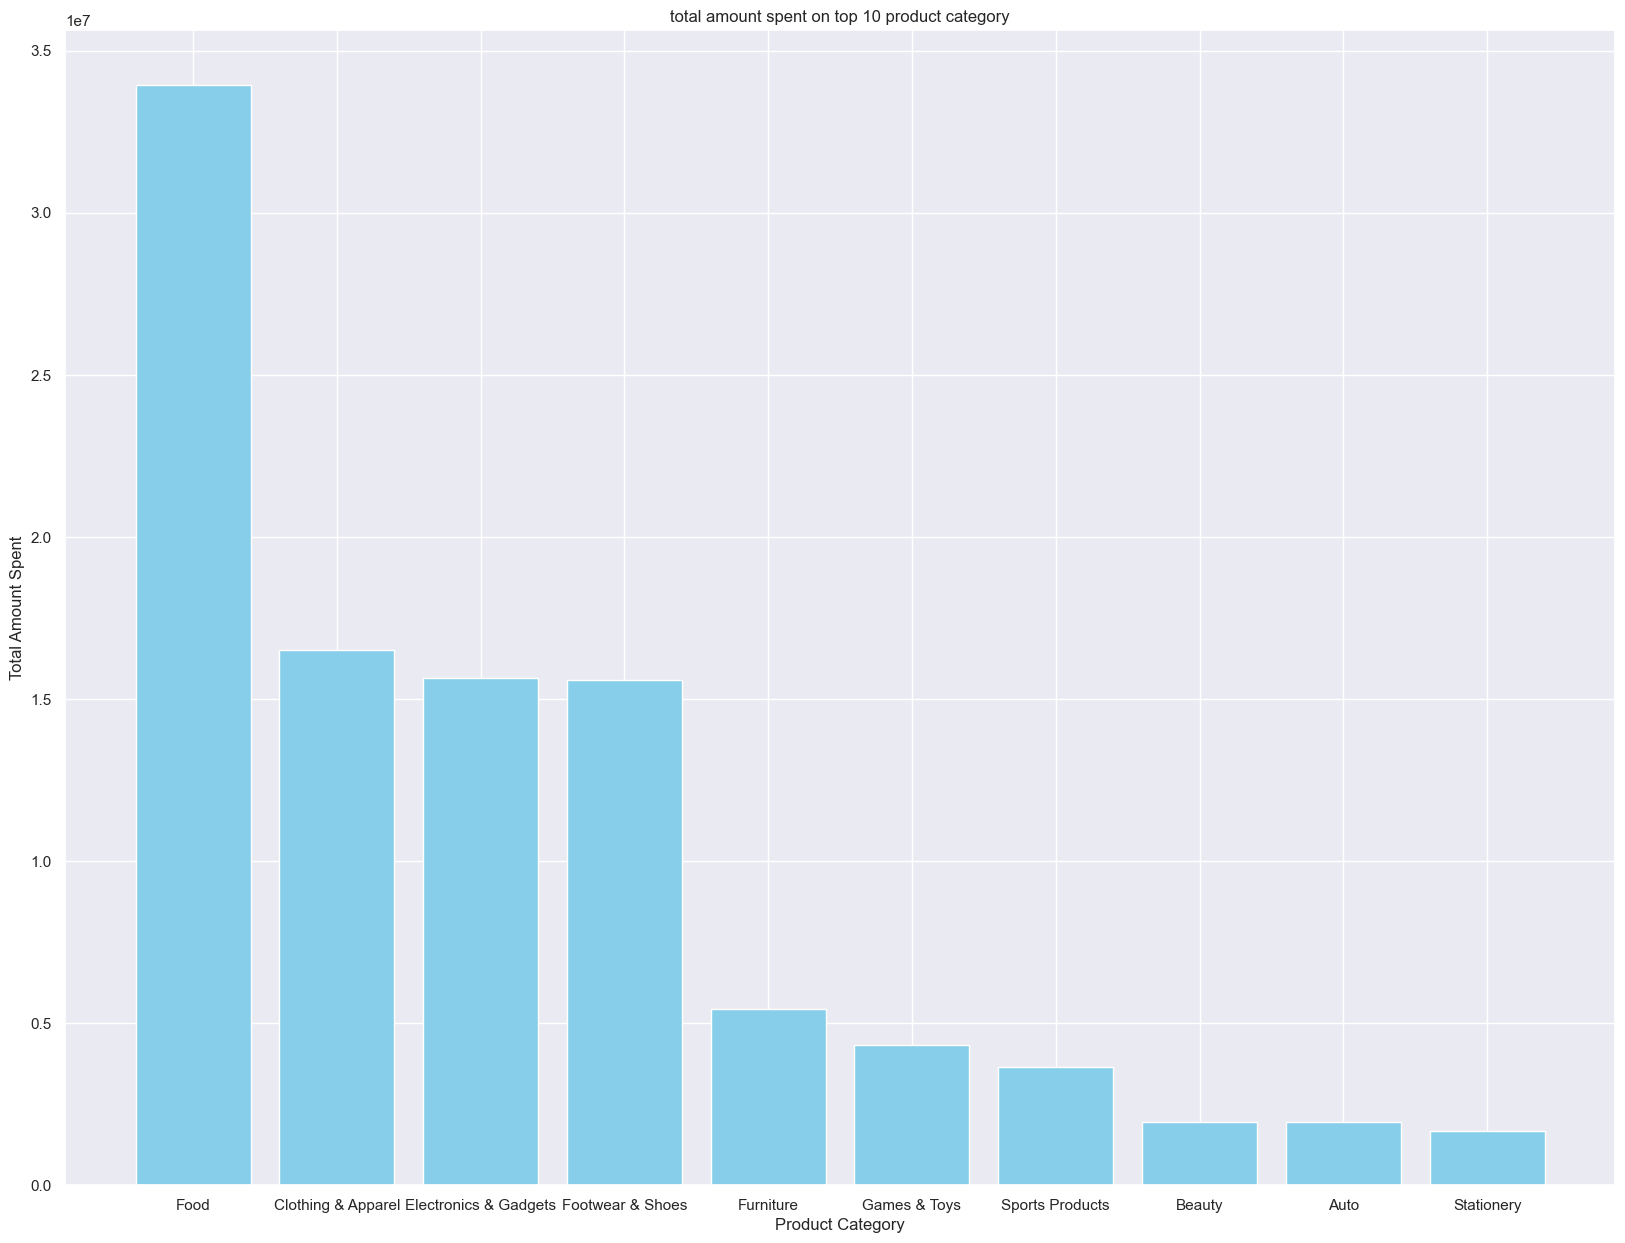

In [64]:
product_data=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values( by='Amount',ascending=False).head(10)
plt.title("total amount spent on top 10 product category")
plt.xlabel("Product Category")
plt.ylabel("Total Amount Spent")
plt.bar(product_data['Product_Category'],product_data['Amount'], color='#87CEEB')
plt.show()

In [ ]:
# usefull insigts from above EDA:
# 1. Female Spent more money as well as place more orders
# 2.most of customers are of agegroup(26-35) and most of these are females
# 3.most of the customers from Utter Pradesh,Mahastara,Karnatka
# 4.married pepole spent more than unmarrid
# 5.People of IT Sector and Healthcare spend more money and among top order placed 
# 6.Customers place most orders on Clothing &Apparel and spent more money on food.